## read bibliotecs

In [15]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# create a seaborn plot
sns.set(style="darkgrid")
import os
import glob

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler

## loadeing data set 

In [5]:
!ls rois/

amostras_coletadas_mapa_referencia_2022_S2_v2_points.csv


In [6]:
name_file = 'amostras_coletadas_mapa_referencia_2022_S2_v2_points.csv'
print('lindo {} '.format(name_file))
newdf = pd.read_csv('rois/' + name_file)     
newdf = newdf.drop(['system:index','.geo'], axis=1)
newdf.shape

lindo amostras_coletadas_mapa_referencia_2022_S2_v2_points.csv 


(250479, 65)

In [8]:
newdf.columns

Index(['afvi_median_dry', 'afvi_median_wet', 'avi_median_dry',
       'avi_median_wet', 'awei_median_dry', 'awei_median_wet',
       'blue_median_dry', 'blue_median_wet', 'brba_median_dry',
       'brba_median_wet', 'brightness_median_dry', 'brightness_median_wet',
       'bsi_median_dry', 'bsi_median_wet', 'classe', 'cvi_median_dry',
       'cvi_median_wet', 'dswi5_median_dry', 'dswi5_median_wet',
       'evi_median_dry', 'evi_median_wet', 'gcvi_median_dry',
       'gcvi_median_wet', 'gemi_median_dry', 'gemi_median_wet',
       'gli_median_dry', 'gli_median_wet', 'green_median_dry',
       'green_median_wet', 'gvmi_median_dry', 'gvmi_median_wet',
       'iia_median_dry', 'iia_median_wet', 'lswi_median_dry',
       'lswi_median_wet', 'mbi_median_dry', 'mbi_median_wet',
       'ndwi_median_dry', 'ndwi_median_wet', 'nir_median_dry',
       'nir_median_dry_contrast', 'nir_median_wet', 'nir_median_wet_contrast',
       'osavi_median_dry', 'osavi_median_wet', 'ratio_median_dry',
       'rat

In [9]:
columns_features = [
    'afvi_median_dry', 'afvi_median_wet', 'avi_median_dry',
    'avi_median_wet', 'awei_median_dry', 'awei_median_wet',
    'blue_median_dry', 'blue_median_wet', 'brba_median_dry',
    'brba_median_wet', 'brightness_median_dry', 'brightness_median_wet',
    'bsi_median_dry', 'bsi_median_wet',  'cvi_median_dry',
    'cvi_median_wet', 'dswi5_median_dry', 'dswi5_median_wet',
    'evi_median_dry', 'evi_median_wet', 'gcvi_median_dry',
    'gcvi_median_wet', 'gemi_median_dry', 'gemi_median_wet',
    'gli_median_dry', 'gli_median_wet', 'green_median_dry',
    'green_median_wet', 'gvmi_median_dry', 'gvmi_median_wet',
    'iia_median_dry', 'iia_median_wet', 'lswi_median_dry',
    'lswi_median_wet', 'mbi_median_dry', 'mbi_median_wet',
    'ndwi_median_dry', 'ndwi_median_wet', 'nir_median_dry',
    'nir_median_dry_contrast', 'nir_median_wet', 'nir_median_wet_contrast',
    'osavi_median_dry', 'osavi_median_wet', 'ratio_median_dry',
    'ratio_median_wet', 'red_median_dry', 'red_median_dry_contrast',
    'red_median_wet', 'red_median_wet_contrast', 'ri_median_dry',
    'ri_median_wet', 'rvi_median', 'rvi_median_wet', 'shape_median_dry',
    'shape_median_wet', 'swir1_median_dry', 'swir1_median_wet',
    'swir2_median_dry', 'swir2_median_wet', 'ui_median_dry',
    'ui_median_wet', 'wetness_median_dry', 'wetness_median_wet'
]
classe = 'classe'

In [10]:
len(columns_features)

64

In [25]:
newdf.classe.unique()

8

In [26]:
newdf['classe'].value_counts()

classe
4     83136
18    49947
33    48982
15    35462
24    14485
25    11119
29     4308
3      3040
Name: count, dtype: int64

In [30]:
dictClass = {
    '3': 'Formação Florestal',
    '4': 'Formação Savânica',
    '12': 'Formação Campestre',
    '29': 'Afloramento Rochoso',
    '15': 'Pastagem',
    '18': 'Agricultura',
    '21': 'Mosaicos de usos',
    '33': 'Corpos de Água',
    '25': 'Outras áreas não Vegetadas',
    '24': 'Área Urbanizada'
}
values_class = [3,4,15,18,24,25,29,33]
dictColor = {
    '3': '#1f8d49',
    '4': '#7dc975',
    '12': '#d6bc74',
    '29': '#ffaa5f',
    '15': '#edde8e',
    '18': '#E974ED',
    '21': '#ffefc3',
    '33': '#0000FF',
    '25': '#d4271e',
    '24': '#d4271e'
}

## Correlation analises 

#### ploting graph correlation

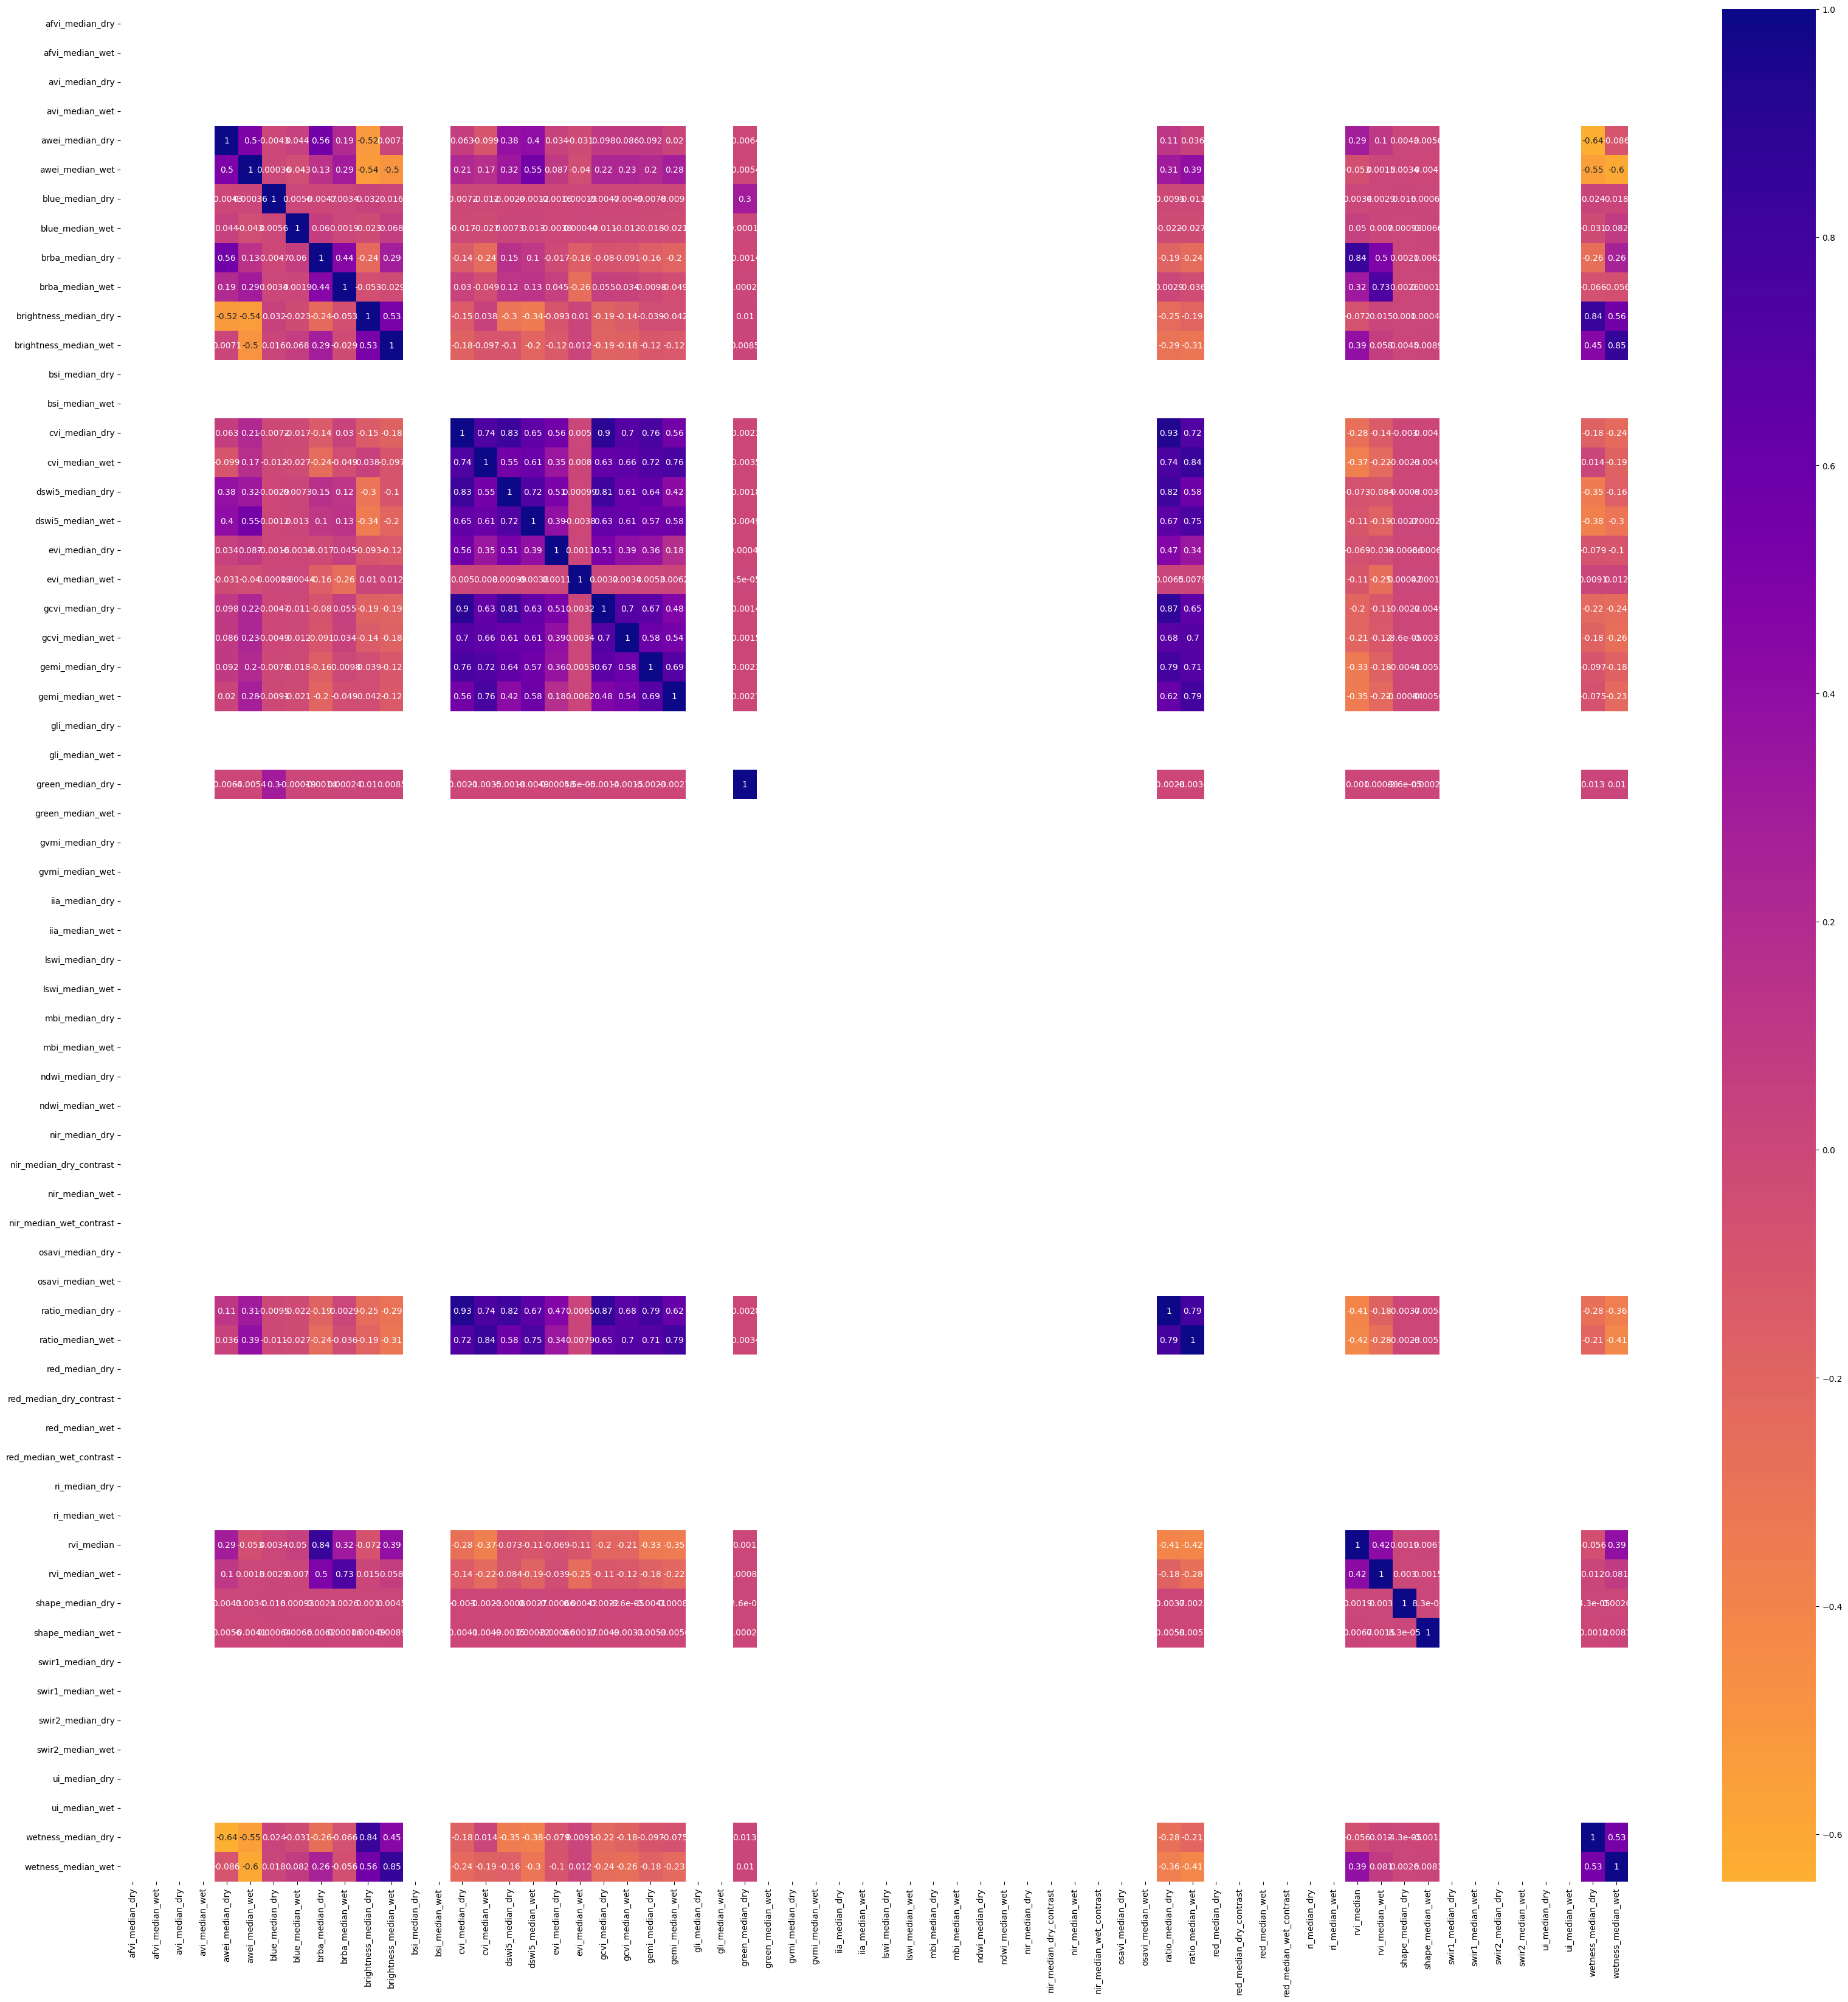

In [13]:
corr = newdf[columns_features].corr()
plt.figure(figsize=(40,40))
ax = sns.heatmap(corr, cmap="plasma_r",center=0, annot=True)
plt.show()

In [14]:
# save the plot as PNG file
plt.savefig("correlation_features_space_plot.png")

<Figure size 640x480 with 0 Axes>

In [16]:
lst_features_dry = []
lst_features_wet = []
for col in columns_features:
    if '_dry' in col:
        lst_features_dry.append(col)
    elif '_wet' in col:
        lst_features_wet.append(col)

print(f"we have {len(lst_features_dry)} features for DRY periode!")
print(f"we have {len(lst_features_wet)} features for WET periode!")

we have 31 features for DRY periode!
we have 32 features for WET periode!


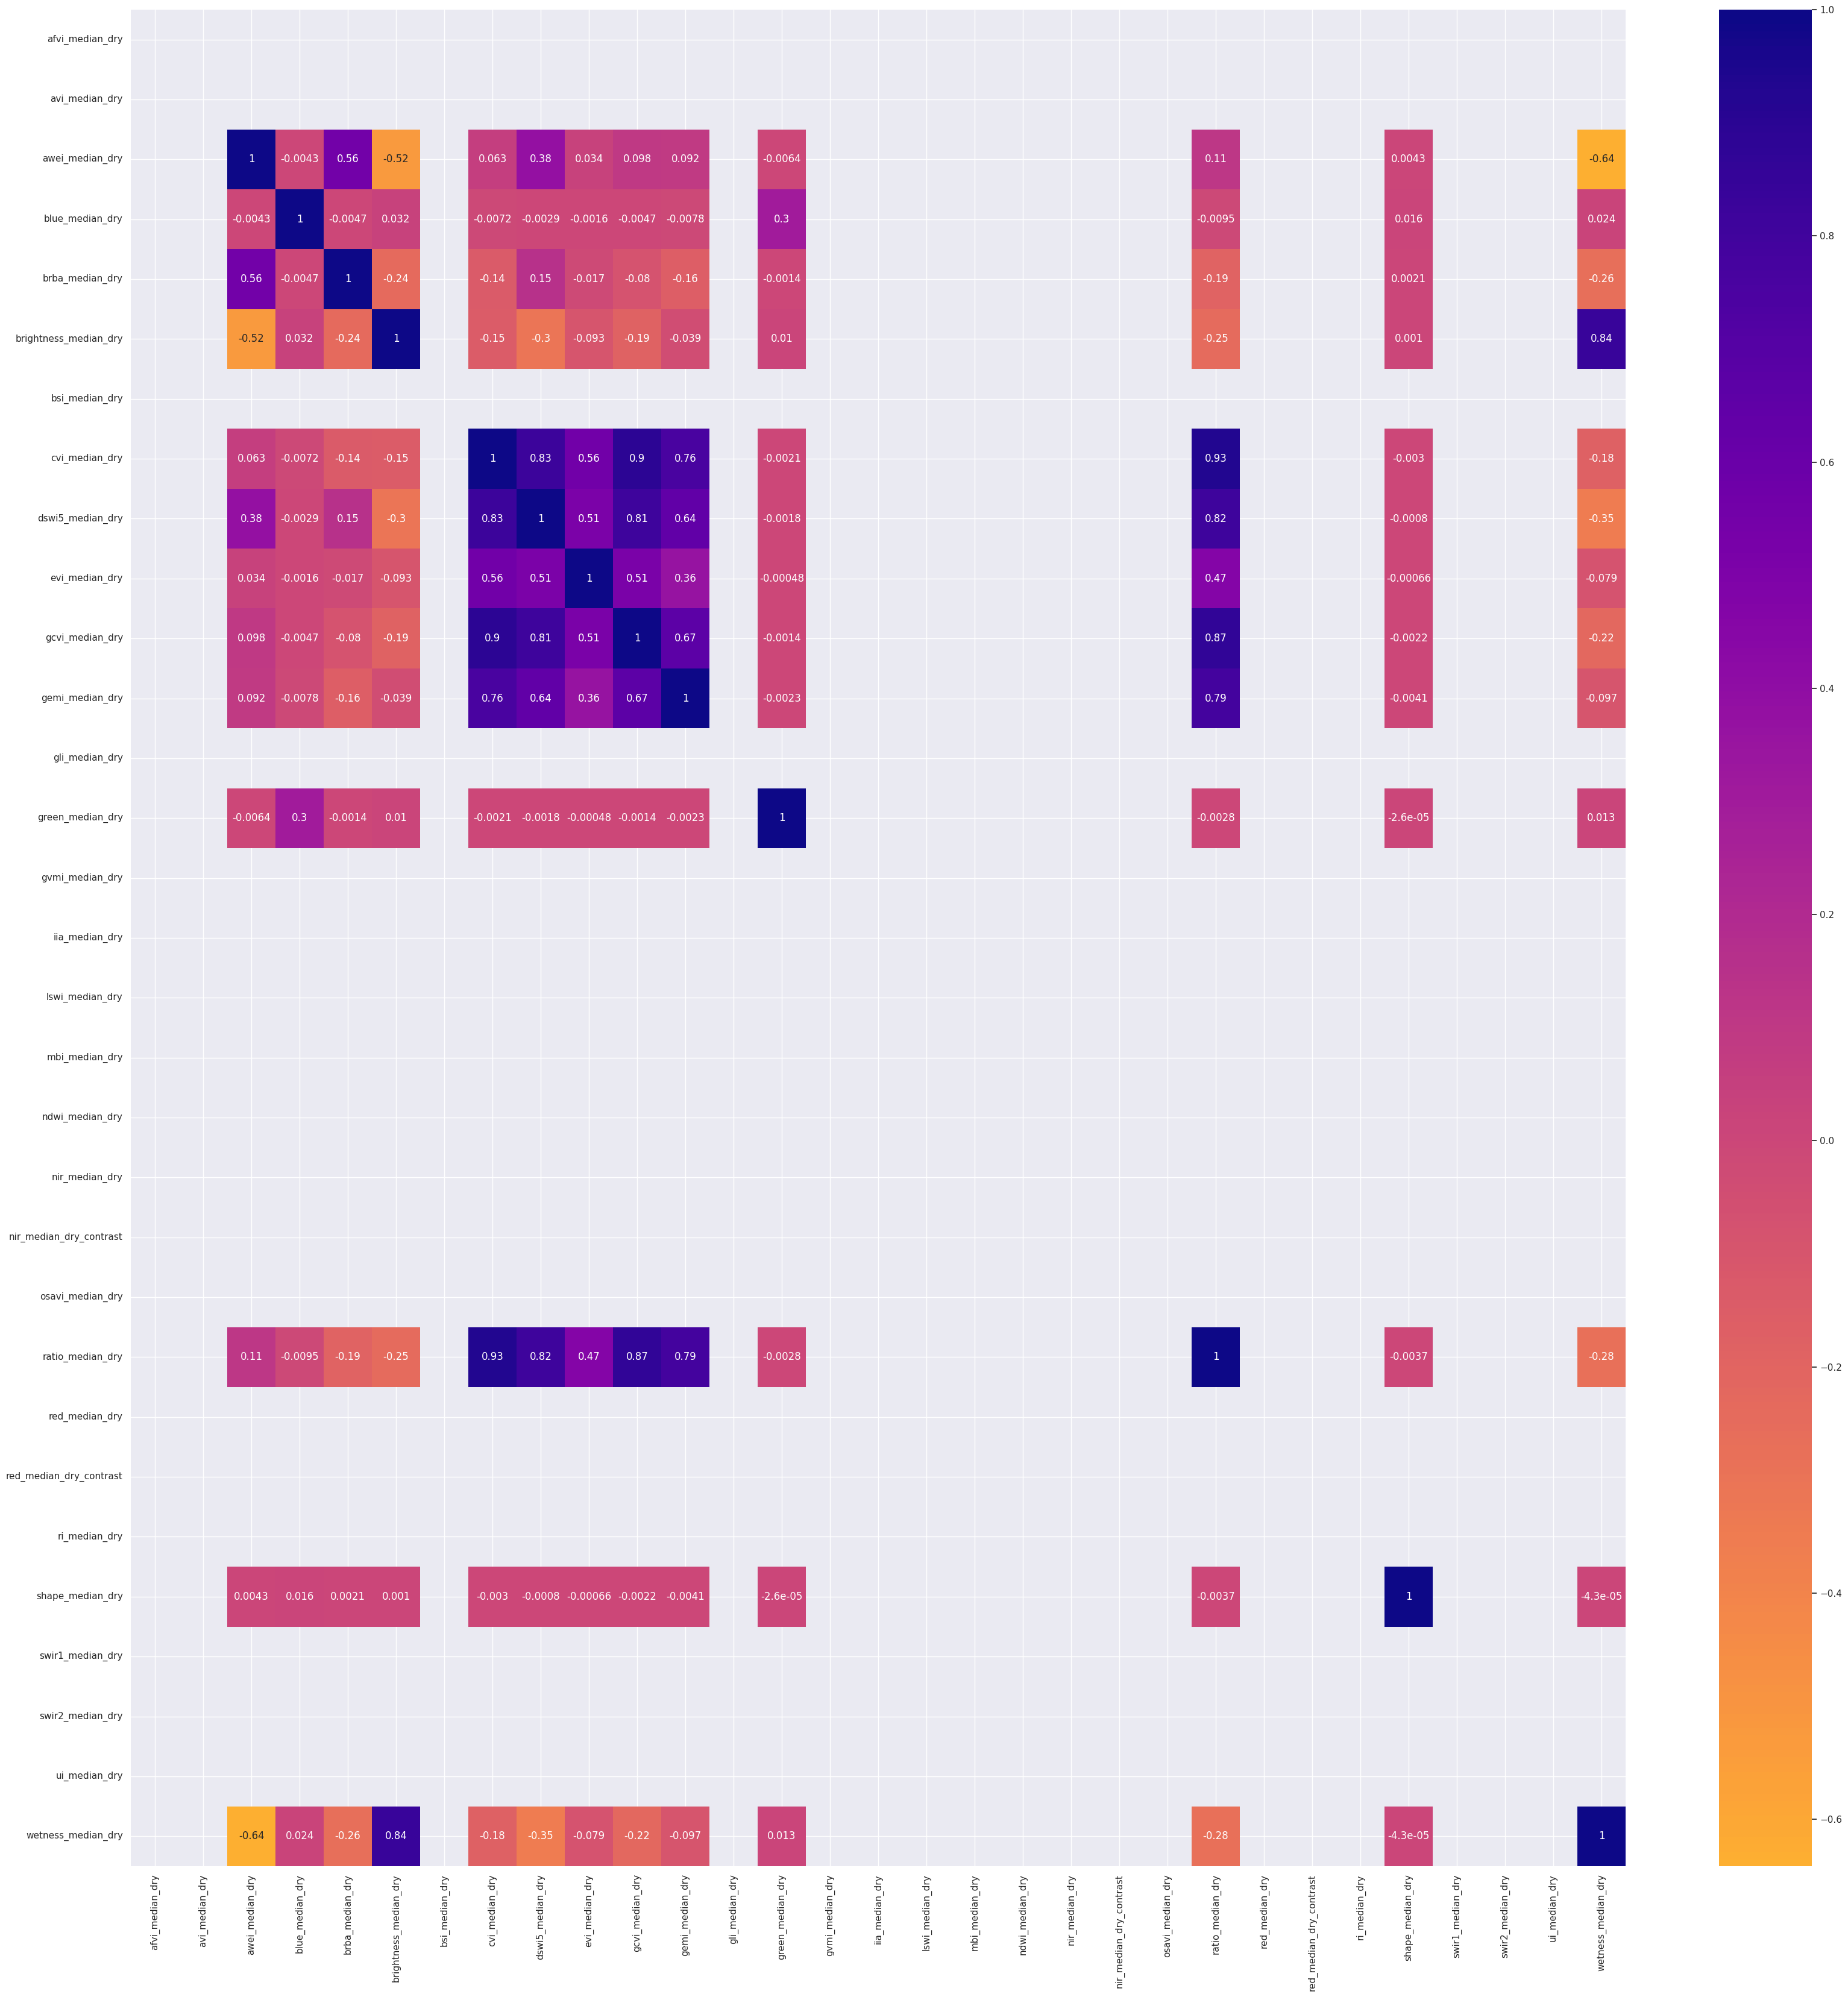

In [18]:
corrDry = newdf[lst_features_dry].corr()
plt.figure(figsize=(40,40))
ax = sns.heatmap(corrDry, cmap="plasma_r",center=0, annot=True)
plt.show()

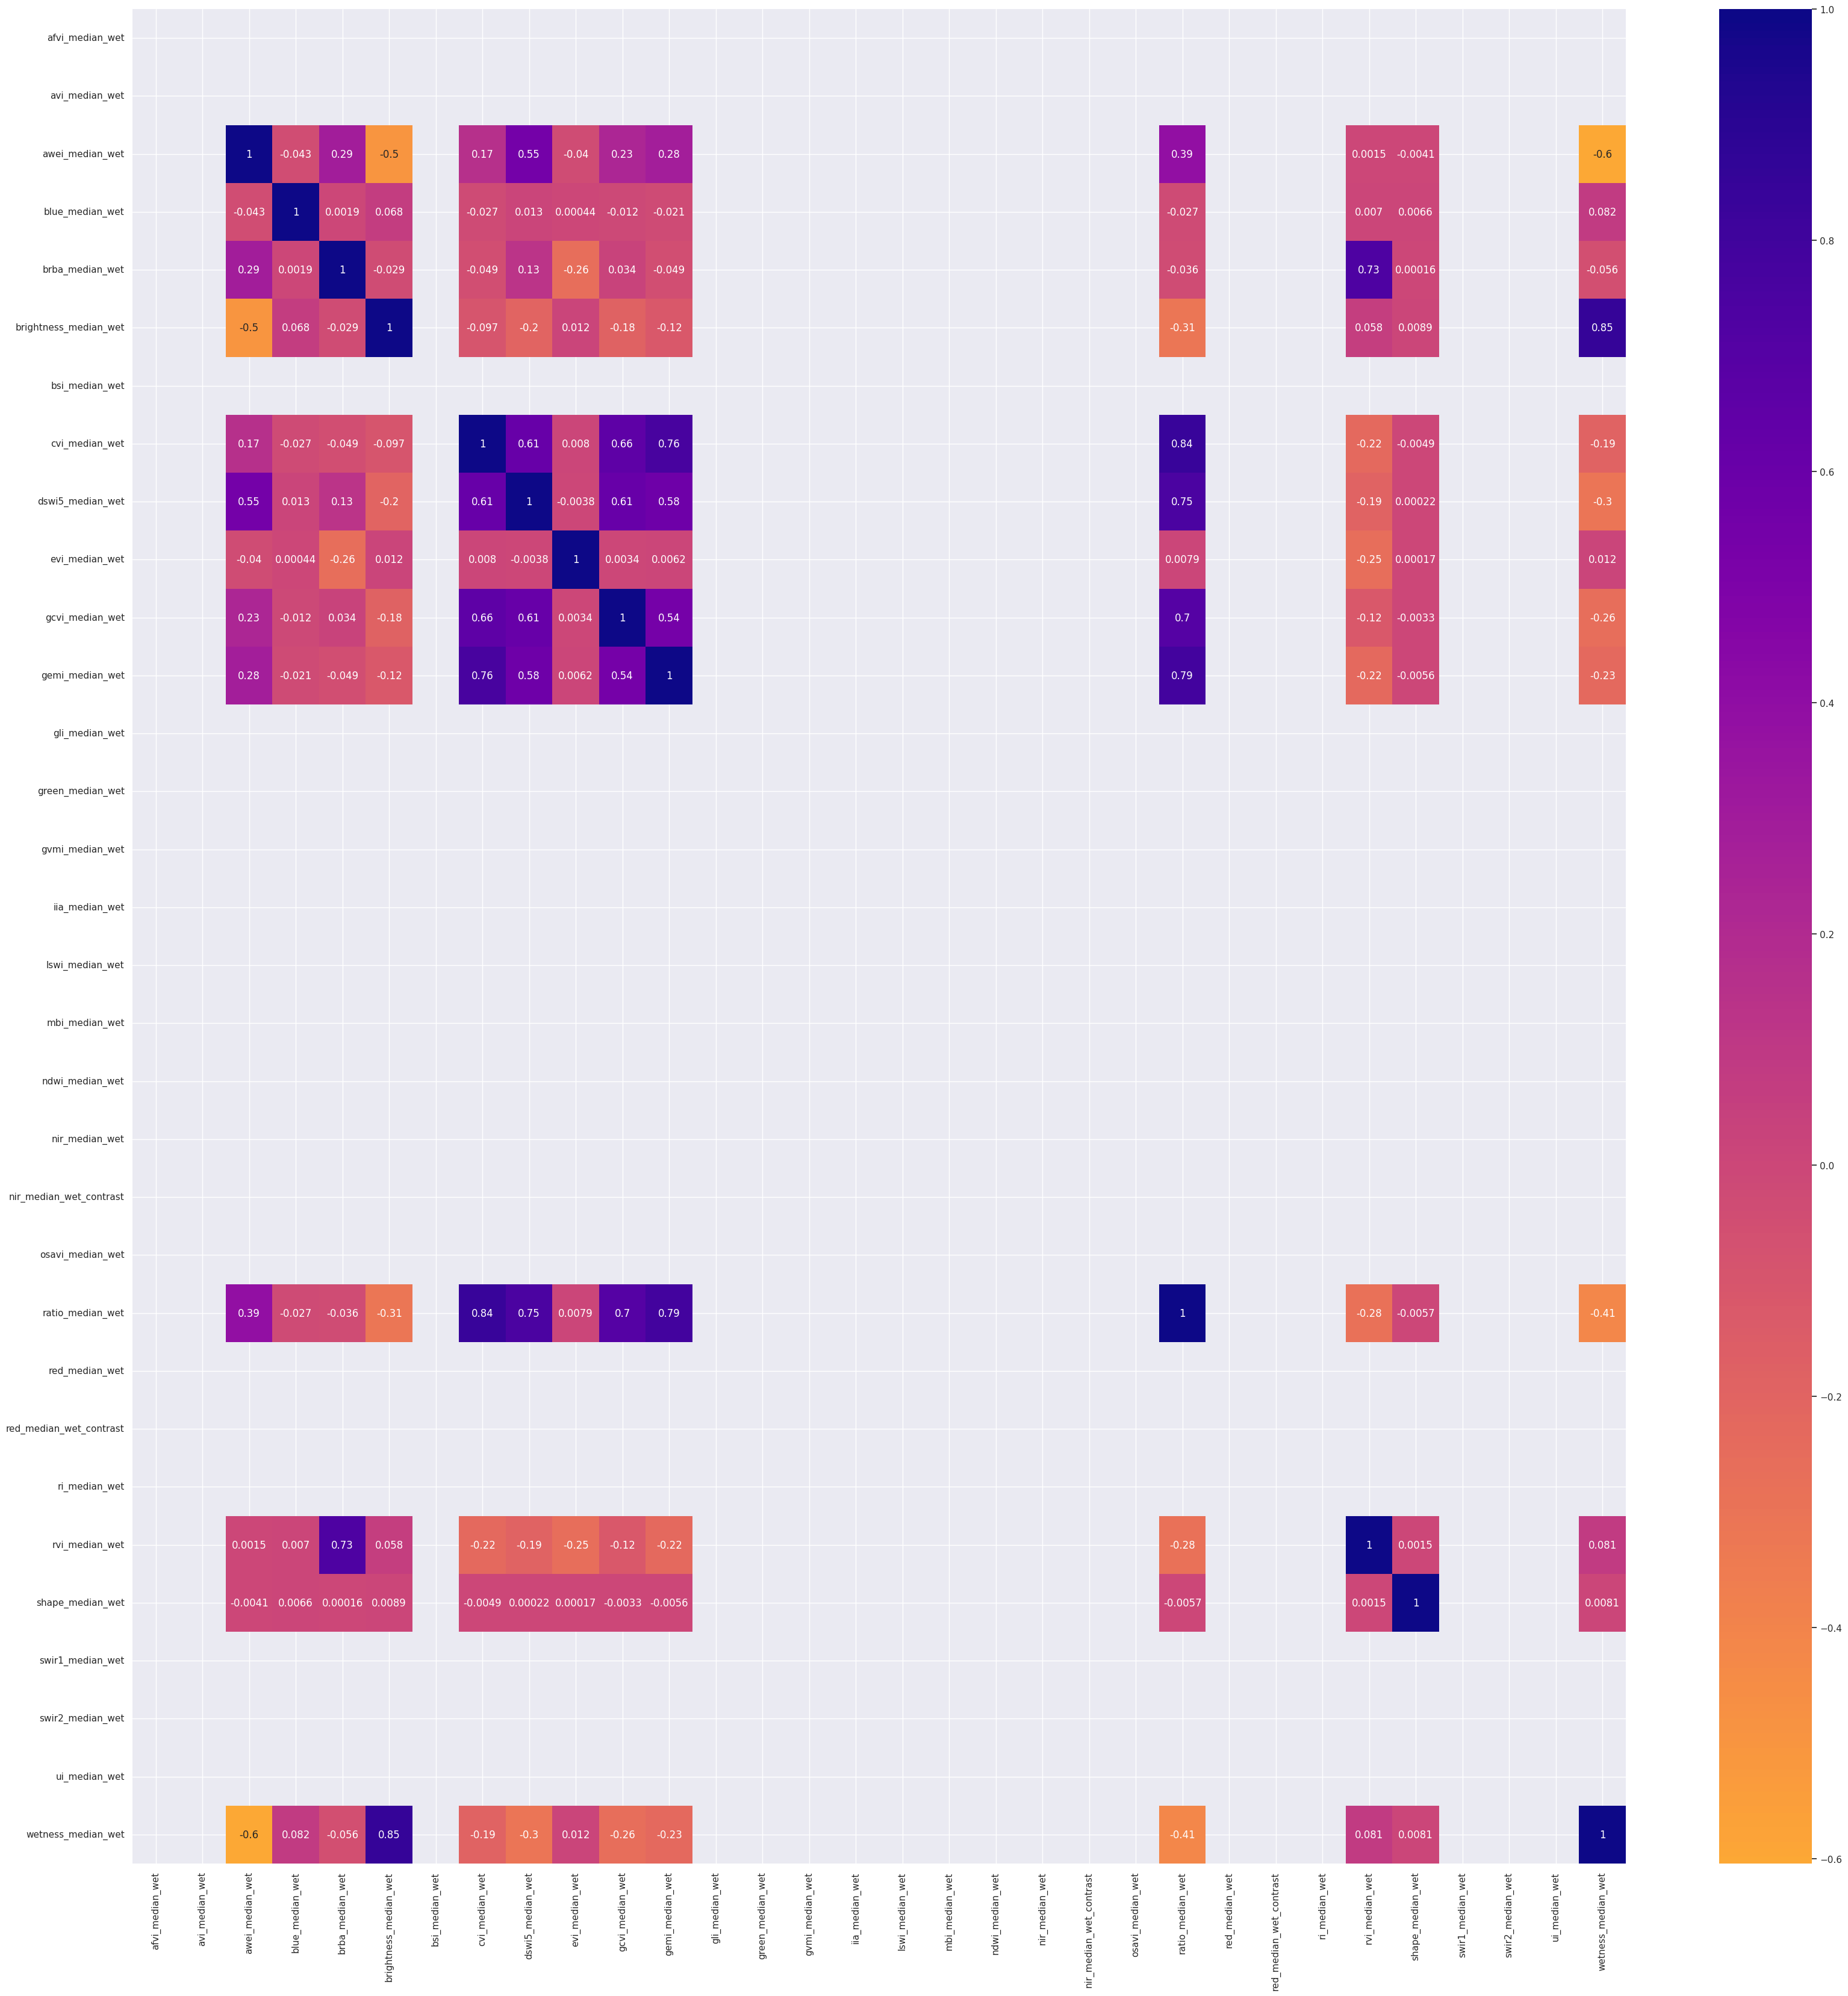

In [19]:
corrWet = newdf[lst_features_wet].corr()
plt.figure(figsize=(40,40))
ax = sns.heatmap(corrWet, cmap="plasma_r",center=0, annot=True)
plt.show()

#### selecionando asbandas correlacionadas 

In [ ]:
size_matrix = corr.shape[0]
columns = np.full((size_matrix), True, dtype= bool)
for row in range(size_matrix):
    for col in range(row + 1, size_matrix):
        if corr.iloc[row,col] >= 0.9:
            if columns[col]:
                columns[col] = False
print(columns)
print()

In [ ]:
print(columns.shape)
print(type(columns))
columns = pd.Series(columns)
print(type(columns))

In [ ]:
selected_columns = concat_df[columns_features].columns[columns]
selected_columns = [kk for kk in selected_columns]
print(selected_columns)
print("with {} Features".format(len(selected_columns)))

In [ ]:
corr_red = concat_df[selected_columns].corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_red, cmap="plasma_r", center=0, annot=True)

In [ ]:
cg = sns.clustermap(corr_red, cmap ="YlGnBu", linewidths = 0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

In [ ]:
m_classe = [kk for kk in concat_df['class'].unique()]
m_classe

In [ ]:
sorted(m_classe)

### analises ROIS by cover class

In [32]:
ls_1 = ['blue_median_dry', 'blue_median_wet', 'nir_median_wet', 'swir1_median_dry']  # , 'nir_stdDev'
ls_2 = ['swir1_median_dry', 'swir1_median_wet', 'ndwi_median_dry', 'awei_median_dry']
ls_3 = ['gli_median_dry', 'gli_median_wet', 'green_median_dry','gcvi_median_dry']
ls_4 = ['nir_median_dry', 'nir_median_dry_contrast','osavi_median_dry','ratio_median_wet']
ls_5 = ['shape_median_dry', 'shape_median_wet', 'swir1_median_dry','ui_median_dry']
ls_6 = ['brightness_median_dry', 'bsi_median_dry', 'dswi5_median_dry', 'evi_median_dry']

/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

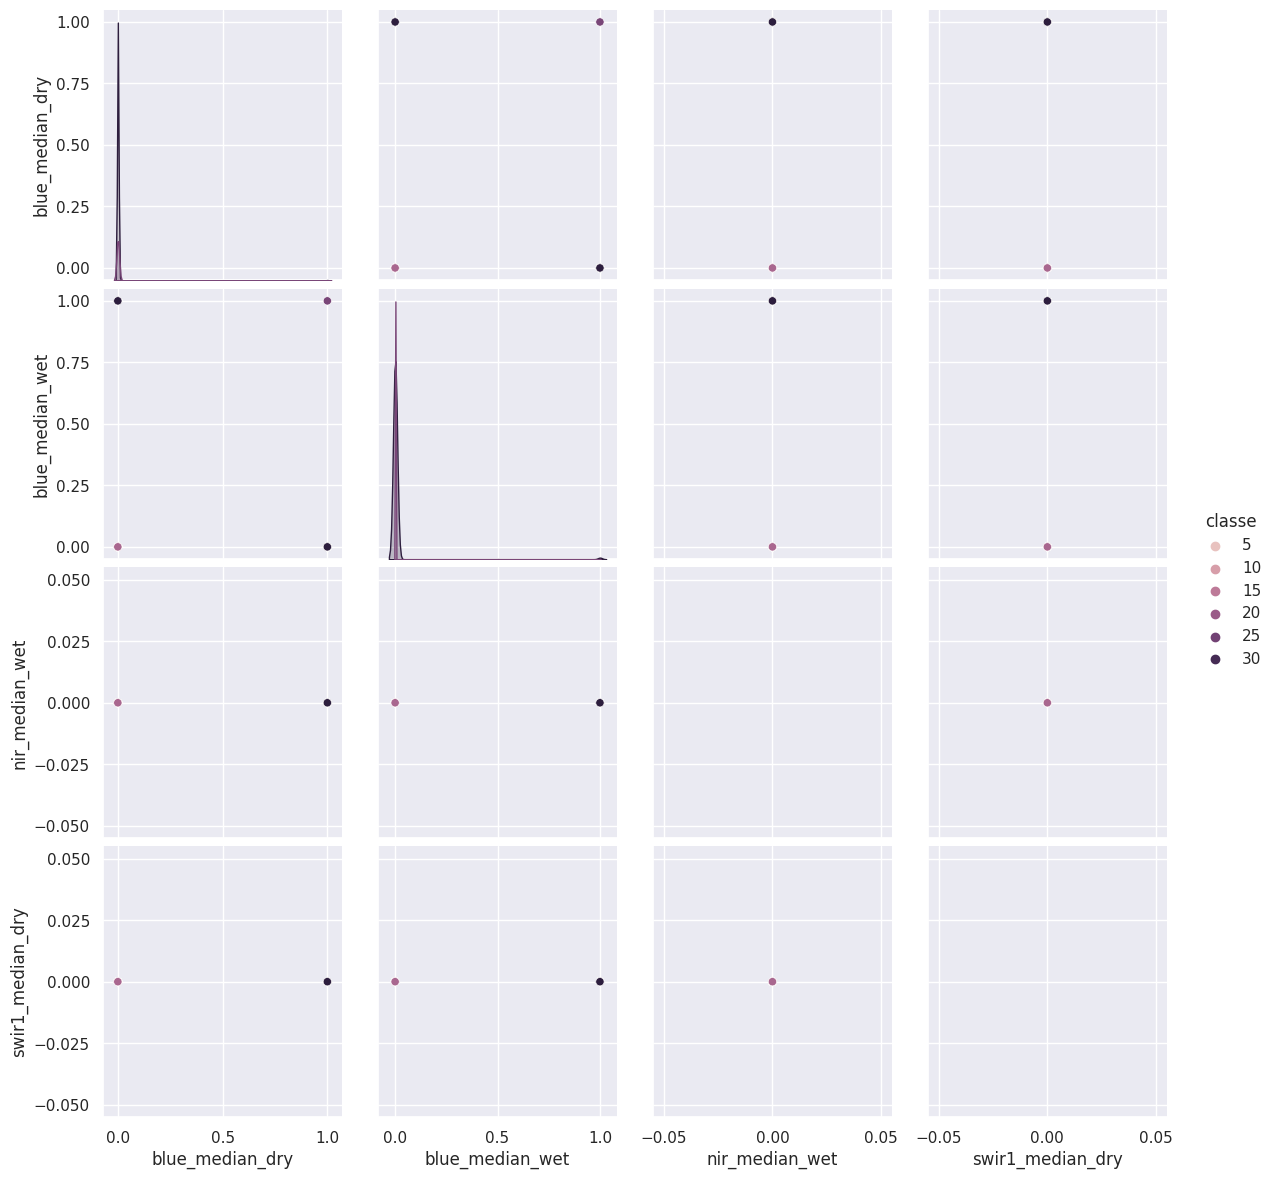

In [33]:
sns.pairplot(vars=ls_1, data= newdf, hue='classe', height=3) #height=5, markers=["o", "h",'>','<','^','p']
sns.set_context("notebook", font_scale=1.5)  

In [ ]:
# sns.pairplot(vars=['B11_d', 'B4_d', 'awei_d', 'B11', 'wetness_d'], data= concat_df, hue='class', height=5, markers=["o", "s"])
# sns.set_context("notebook", font_scale=1.5) 

In [ ]:
sns.pairplot(vars=ls_2, data= newdf, hue='class', height=5, markers=["o", "v",'>','<','^','.'])
sns.set_context("notebook", font_scale=1.5)  

In [ ]:
sns.pairplot(vars=ls_3, data= concat_df, hue='class', height=5, markers=["o", "v",'>','<','^','.'])
sns.set_context("notebook", font_scale=1.5)  

In [ ]:
sns.pairplot(vars=ls_4, data= concat_df, hue='class', height=5, markers=["o", "v",'>','<','^','.'])
sns.set_context("notebook", font_scale=1.5)  

In [ ]:
sns.pairplot(vars=ls_5, data= concat_df, hue='class', height=5, markers=["o", "v",'>','<','^','.'])
sns.set_context("notebook", font_scale=1.5)  

In [ ]:
sns.pairplot(vars=ls_6, data= concat_df, hue='class', height=5, markers=["o", "v",'>','<','^','.'])
sns.set_context("notebook", font_scale=1.5)  

## Selecting columns based on p-values
selected_columns

In [ ]:
import statmodels.formula.api as sm

In [36]:
reduce_columns = columns_features[1:]
def backwardElimination(x, Y, sl, columns):
    
    numVars = len(x[0])
    
    for i in range(numVars):
        
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(numVars - i):
                if regressor_OLS.pvalues[j].astype(float) == maxVar:
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    


In [39]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(
                            newdf[columns_features][:, 1:].values, 
                            newdf[columns_features][:, 1:].values, 
                            SL, columns_features)

InvalidIndexError: (slice(None, None, None), slice(1, None, None))

## Modelos para classificação
#Passos:
1. Criar base de dados de teste e treinamento
2. Instanciar o modelo
3. Especificar hiperparâmetros
4. Instanciar GridSearchCV e RandomizedSearchCV 
5. Realizar treinamento na base de dados de treino
6. Realizar predict
7. Avaliar modelo com a base de dados de teste

In [40]:
X = newdf[columns_features]
y = newdf['classe']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [42]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['Random Forest'])
metrics

,Random Forest
accuracy,NaN
precision,NaN
recall,NaN
AUC,NaN
Time to Train,NaN


In [43]:
classifier_rf = RandomForestClassifier(random_state=0)

In [44]:
param_grid_rf = {
    'classifier__n_estimators': [70, 100, 130, 150, 170],
    'classifier__criterion': ["entropy"],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_leaf': randint(1, 9),
}

In [45]:
param_grids = [param_grid_rf]
model_names = ['Random Forest']
cv_names = ['rf_cv']
cvs = [5]

In [46]:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    #### Step 5: Instantiate the CV Object
    
    if model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv,iid=False,)  # , iid=False
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv,  random_state=None)

    # Treinamento
    t0 = time.time()
    cv.fit(x_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['Time to Train', model_name] = ttt

    #predict

    y_pred = cv.predict(x_test)

    # Avaliação

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(x_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test, average='micro')
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test, average='micro')
    
    '''
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(x_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)
    '''

    #print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    '''
    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob, multi_class="ovr")
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()
    '''
    return cv

#### Anális das features para uma bacia

In [47]:
pipeline = Pipeline(steps=[('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)

It takes 809.151 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.909
              precision    recall  f1-score   support

           3       0.91      0.75      0.82      1205
           4       0.94      0.96      0.95     33114
          15       0.76      0.83      0.80     14229
          18       0.96      0.95      0.95     20204
          24       0.79      0.73      0.76      5770
          25       0.75      0.67      0.70      4452
          29       0.76      0.59      0.66      1781
          33       0.99      0.99      0.99     19437

    accuracy                           0.91    100192
   macro avg       0.86      0.81      0.83    100192
weighted avg       0.91      0.91      0.91    100192



In [48]:
rf_cv.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': None,
 'classifier__min_samples_leaf': 2,
 'classifier__n_estimators': 150}

In [49]:
classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, n_estimators=100, random_state=0)
score = classifier_rf.fit(x_train, y_train)

/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Importância de cada feature')

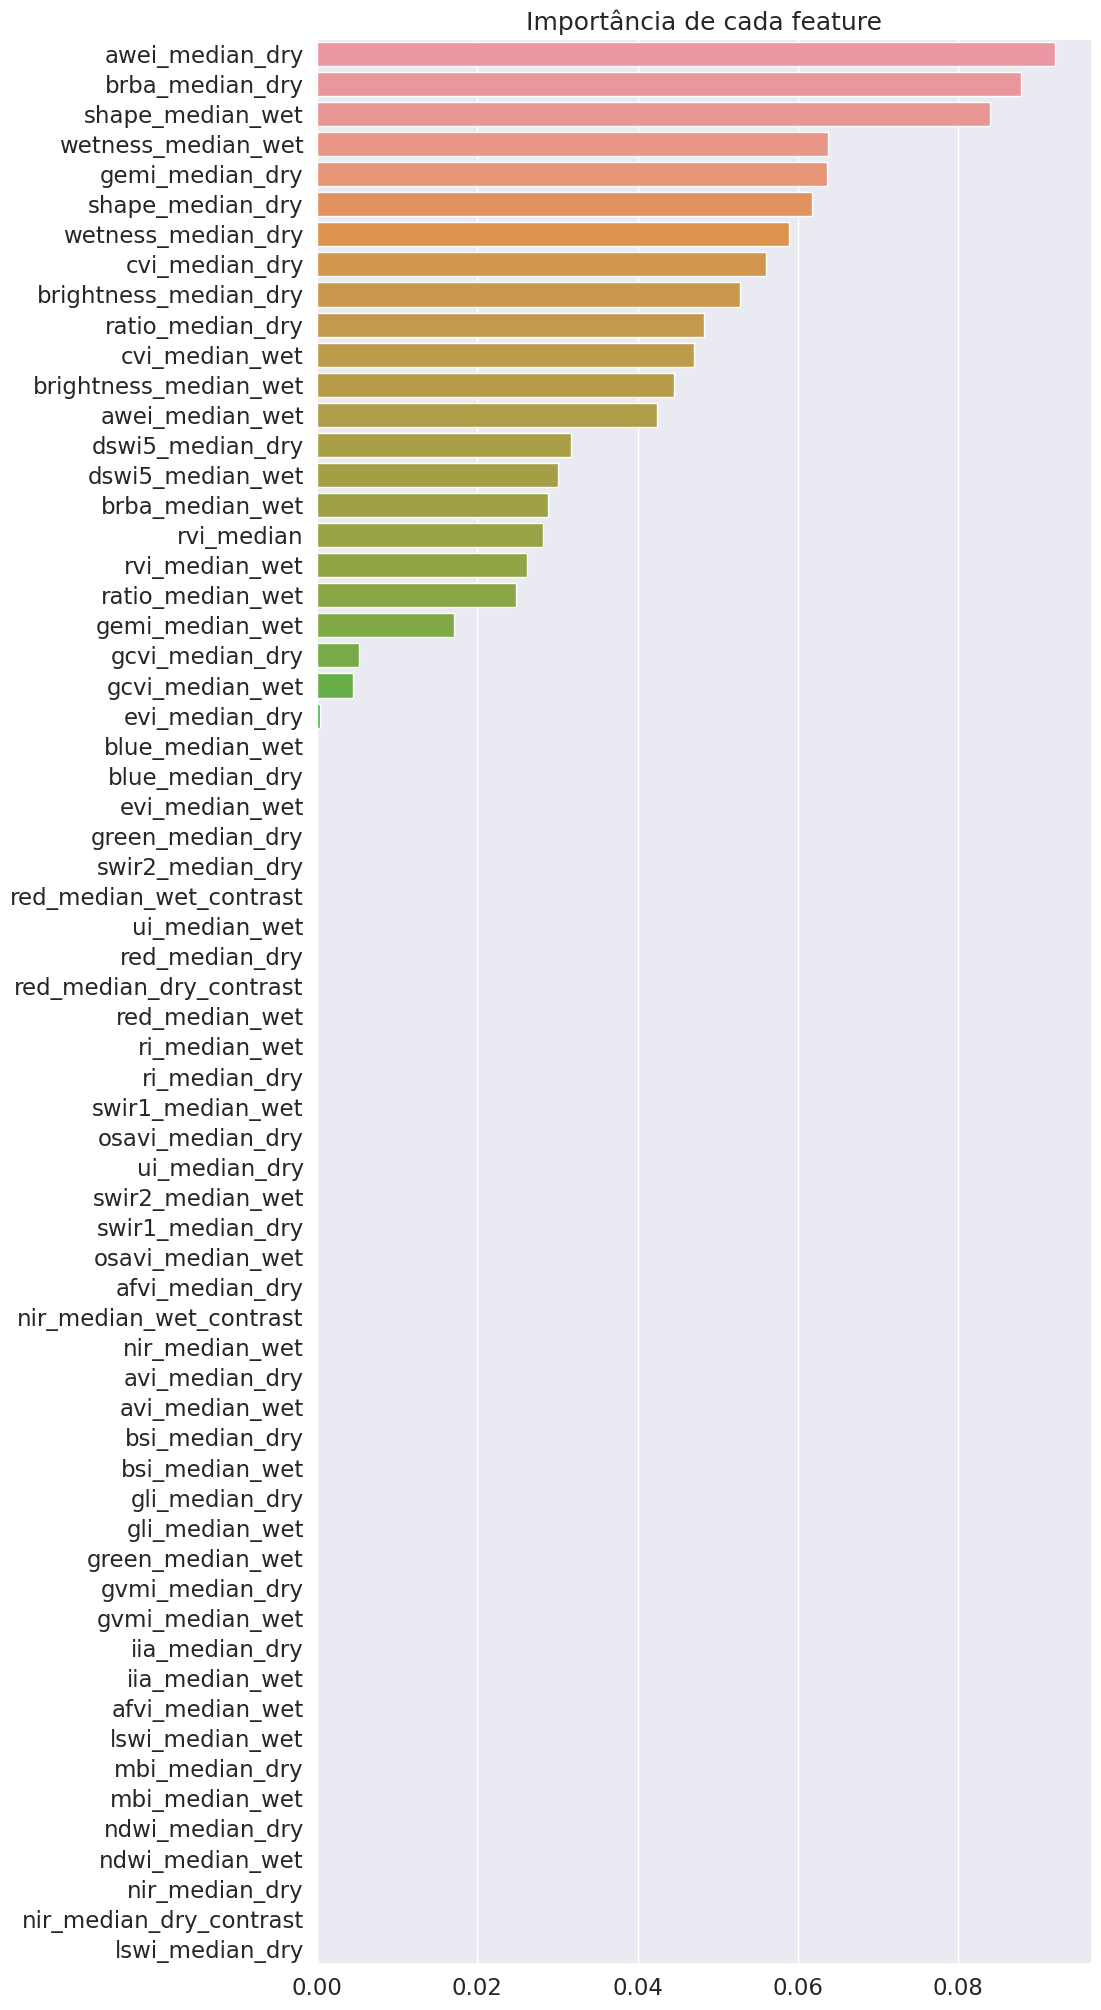

In [50]:
importances = pd.Series(data=classifier_rf.feature_importances_, index=columns_features)
importances = importances.sort_values(ascending = False)
plt.figure(figsize=(10,25))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

#### Anaálise das fatures para somente uma bacia

In [51]:
pipeline = Pipeline(steps=[('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)

It takes 628.874 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.902
              precision    recall  f1-score   support

           3       0.93      0.70      0.80      1205
           4       0.94      0.96      0.95     33114
          15       0.73      0.83      0.78     14229
          18       0.95      0.94      0.95     20204
          24       0.79      0.70      0.75      5770
          25       0.76      0.63      0.69      4452
          29       0.73      0.53      0.62      1781
          33       0.99      0.98      0.99     19437

    accuracy                           0.90    100192
   macro avg       0.85      0.79      0.81    100192
weighted avg       0.90      0.90      0.90    100192



In [52]:
rf_cv.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': None,
 'classifier__min_samples_leaf': 6,
 'classifier__n_estimators': 130}

In [53]:
classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_estimators=70, random_state=0)
score = classifier_rf.fit(x_train, y_train)

/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Importância de cada feature')

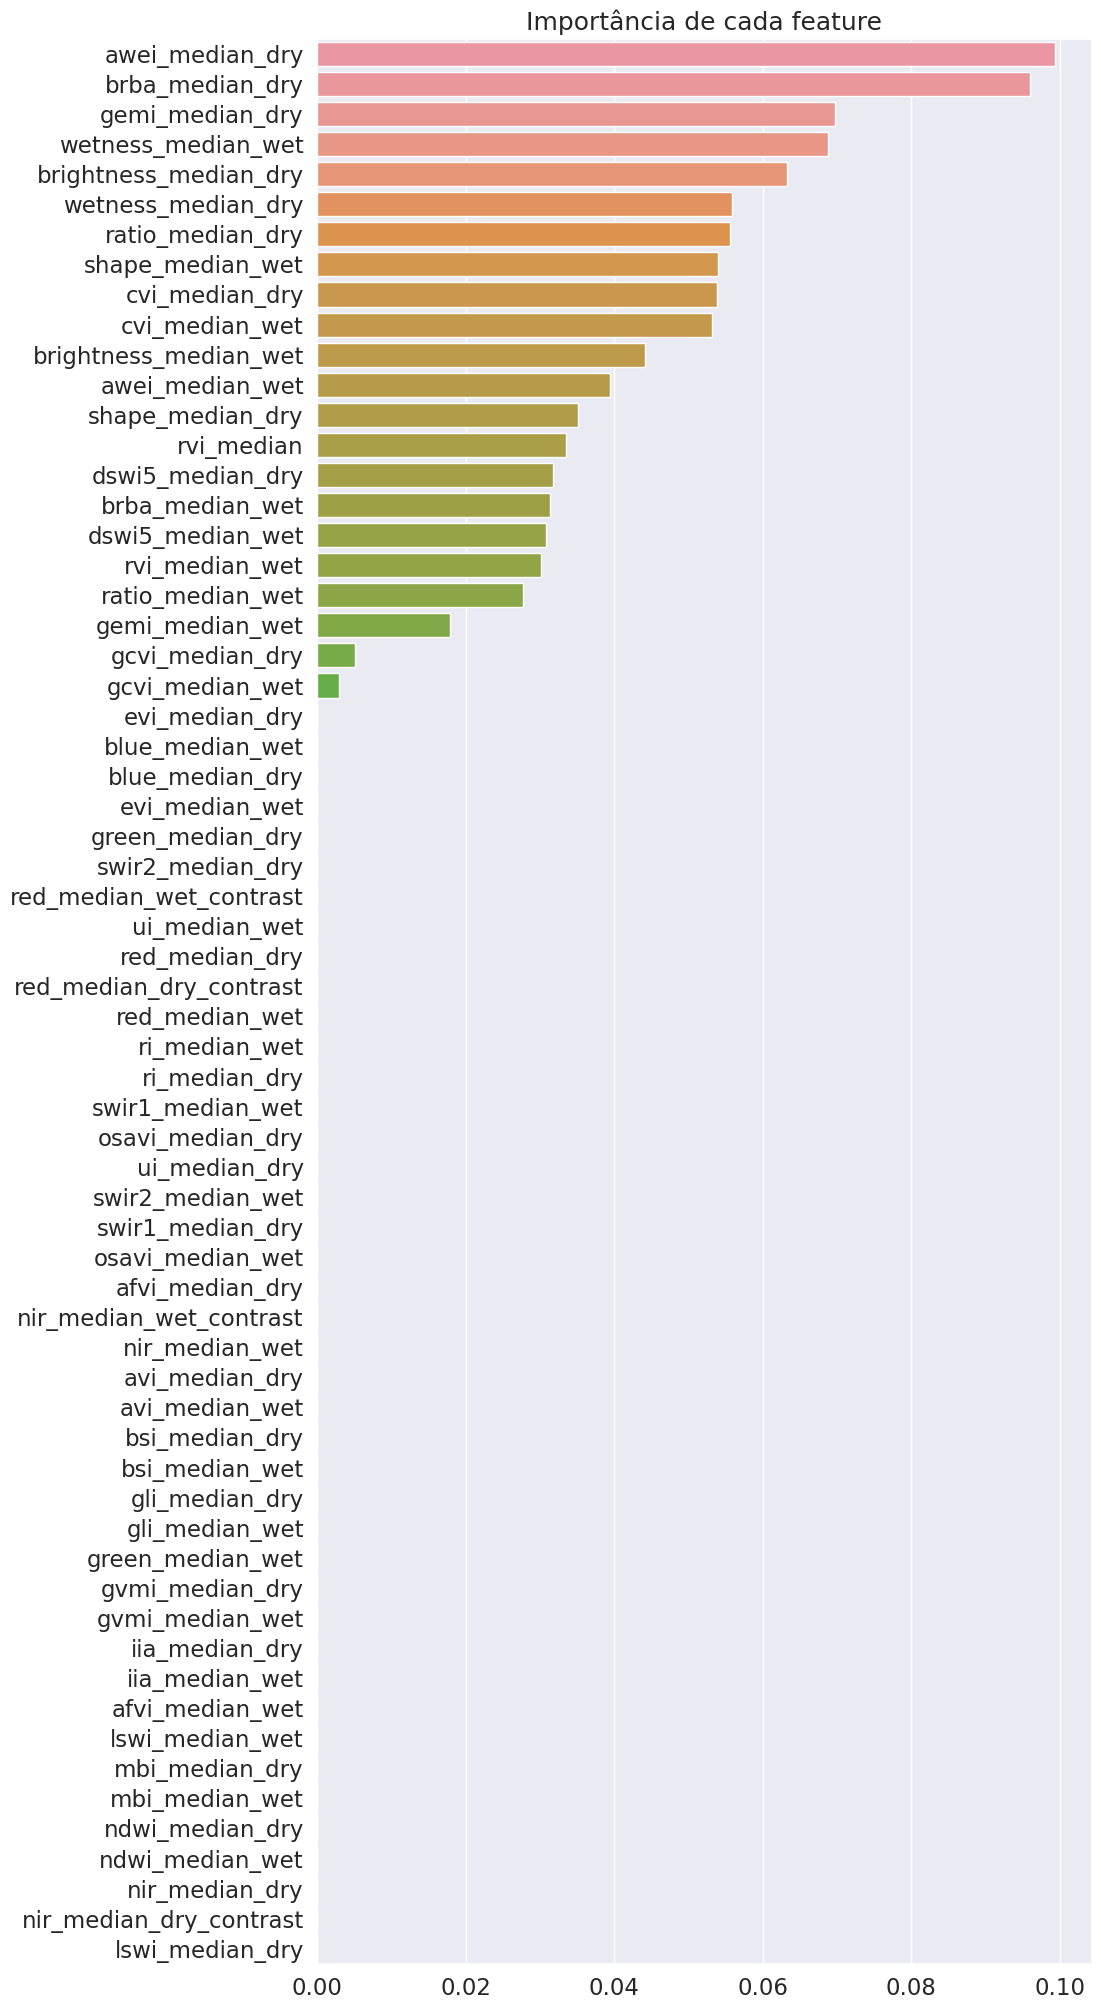

In [55]:
importances = pd.Series(data=classifier_rf.feature_importances_, index=columns_features)
importances = importances.sort_values(ascending = False)
plt.figure(figsize=(10,25))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Análise das melhores features para a Caatinga

In [57]:
features = importances.axes
features = np.array(features)
features = features[0]
features = features[:12]
classe = "class"

x = newdf[features]
y = newdf['classe']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_estimators=50, random_state=0)

classifier_rf.fit(x_train, y_train)

y_pred = classifier_rf.predict(x_test)

accuracy_score(y_pred=y_pred, y_true=y_test)

0.8848910092622165

In [59]:
print("lista de features ", features)

lista de features  ['awei_median_dry' 'brba_median_dry' 'gemi_median_dry'
 'wetness_median_wet' 'brightness_median_dry' 'wetness_median_dry'
 'ratio_median_dry' 'shape_median_wet' 'cvi_median_dry' 'cvi_median_wet'
 'brightness_median_wet' 'awei_median_wet']


In [66]:
inputs_selec= [
    'awei_median_dry','awei_median_wet', 'brba_median_dry', 'brba_median_dry',
    'gemi_median_dry', 'gemi_median_wet', 'wetness_median_wet', 'wetness_median_dry',
    'brightness_median_dry', 'brightness_median_wet', 'ratio_median_dry', 'ratio_median_wet', 
    'shape_median_dry', 'shape_median_wet', 'cvi_median_dry', 'cvi_median_wet',
    'dswi5_median_dry', 'dswi5_median_wet', 'rvi_median_wet', 'swir1_median_dry',
    'gcvi_median_dry', 'gcvi_median_wet', 'evi_median_dry', 'evi_median_wet',
    'blue_median_dry', 'blue_median_wet', 'green_median_wet', 'gvmi_median_dry',
    'swir2_median_dry', 'swir2_median_wet', 'red_median_dry_contrast', 'red_median_wet_contrast', 
    'ui_median_dry', 'ui_median_wet', 'ri_median_dry', 'ri_median_wet',  
    'osavi_median_dry', 'osavi_median_wet', 'ndwi_median_dry', 'ndwi_median_wet',
    'afvi_median_dry', 'afvi_median_wet',   
]   

x_rfc = newdf[inputs_selec]
y_rfc = newdf['classe']
features_selecteds = []

x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(x_rfc, y_rfc, test_size=0.4)

for k in range(1, 32):
  rfe = RFE(estimator= classifier_rf, n_features_to_select= k)
  fit = rfe.fit(x_train_rfc, y_train_rfc)

  cols = fit.get_support(indices=True)

  for i in cols:
    features_selecteds.append(inputs_selec[i])

  print("features: ", features_selecteds)
  x = newdf[features_selecteds]
  y = newdf['classe']

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

  classifier_rf.fit(x_train, y_train)
  y_pred = classifier_rf.predict(x_test)
  acc = accuracy_score(y_pred=y_pred, y_true=y_test)

  print("acc com ", k, "features:  ", acc)
  features_selecteds = []
  
  

features:  ['brba_median_dry']
acc com  1 features:   0.5288146758224209
features:  ['brba_median_dry', 'gemi_median_dry']
acc com  2 features:   0.6842063238581922
features:  ['brba_median_dry', 'gemi_median_dry', 'wetness_median_dry']
acc com  3 features:   0.7857413765570105
features:  ['brba_median_dry', 'brba_median_dry', 'gemi_median_dry', 'wetness_median_dry']
acc com  4 features:   0.7863202650910253
features:  ['awei_median_dry', 'brba_median_dry', 'brba_median_dry', 'gemi_median_dry', 'wetness_median_dry']
acc com  5 features:   0.8019901788565953
features:  ['awei_median_dry', 'brba_median_dry', 'brba_median_dry', 'gemi_median_dry', 'wetness_median_dry', 'cvi_median_dry']
acc com  6 features:   0.8074496965825615
features:  ['awei_median_dry', 'brba_median_dry', 'brba_median_dry', 'gemi_median_dry', 'wetness_median_dry', 'brightness_median_wet', 'cvi_median_dry']
acc com  7 features:   0.8237484030661131
features:  ['awei_median_dry', 'brba_median_dry', 'brba_median_dry', 'g

Análise da separabilidade das melhores Features

In [68]:
inputs_selec= [
    'awei_median_dry','awei_median_wet', 'brba_median_dry', 'brba_median_dry',
    'gemi_median_dry', 'gemi_median_wet', 'wetness_median_wet', 'wetness_median_dry',
    'brightness_median_dry', 'brightness_median_wet', 'ratio_median_dry', 'ratio_median_wet', 
    'shape_median_dry', 'shape_median_wet', 'cvi_median_dry', 'cvi_median_wet',
    'dswi5_median_dry', 'dswi5_median_wet', 'rvi_median_wet', 'swir1_median_dry',
    'gcvi_median_dry', 'gcvi_median_wet', 'evi_median_dry', 'evi_median_wet',
    'blue_median_dry', 'blue_median_wet', 'green_median_wet', 'gvmi_median_dry',
    'swir2_median_dry', 'swir2_median_wet', 'red_median_dry_contrast', 'red_median_wet_contrast', 
    'ui_median_dry', 'ui_median_wet', 'ri_median_dry', 'ri_median_wet',  
    'osavi_median_dry', 'osavi_median_wet', 'ndwi_median_dry', 'ndwi_median_wet',
    'afvi_median_dry', 'afvi_median_wet',   
]   
dadisAnalise = newdf[inputs_selec]
dadisAnalise = dadisAnalise[:100]

sns.pairplot(dadisAnalise, hue="classe", height=2.5, corner=True)

/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/superuser/py-env/py-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Classifcação por bacia
Classificação por ano
Coleetar para a série anterior de mosaico
Guardar lsita d feeature das 30 primeiroas ordenada por bacia e por ano
Mudar paleta de cores